In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [3]:
corpus = pd.read_csv('./test6.csv')

[3, 4, 4, 20, 19]


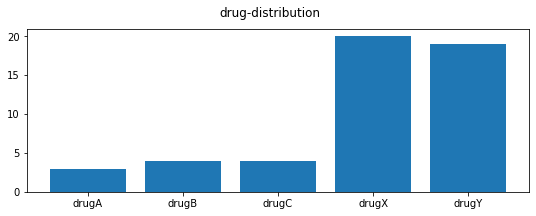

In [16]:
classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
instances = [0, 0, 0, 0, 0]
for row in corpus.values:
    for i in range(len(classes)):
        if row[5] == classes[i]:
            instances[i] +=1
            
print(instances)
graph = plt.figure(figsize=(9,3))
plt.bar(classes,instances)
plt.suptitle('drug-distribution')
plt.show()
graph.savefig('drug-distribution.pdf', dpi=200)

In [17]:
numerical_corpus = pd.get_dummies(corpus, columns=['Sex'])

numerical_corpus.BP = pd.Categorical(numerical_corpus.BP, categories = ['LOW', 'NORMAL', 'HIGH'], ordered=True)
numerical_corpus.BP = numerical_corpus.BP.cat.codes

numerical_corpus.Cholesterol = pd.Categorical(numerical_corpus.Cholesterol,categories = ['NORMAL', 'HIGH'], ordered=True)
numerical_corpus.Cholesterol = numerical_corpus.Cholesterol.cat.codes

print(numerical_corpus)

    Age  BP  Cholesterol  Na_to_K   Drug  Sex_F  Sex_M
0    48   2            0   10.446  drugA      0      1
1    28   1            1    7.798  drugX      1      0
2    47   0            1   11.767  drugC      1      0
3    42   0            0   29.271  drugY      1      0
4    60   1            0   10.091  drugX      0      1
5    23   1            1   16.850  drugY      0      1
6    22   1            1   11.953  drugX      0      1
7    24   2            0   18.457  drugY      1      0
8    64   0            0   25.741  drugY      1      0
9    61   1            1    9.443  drugX      0      1
10   58   2            1   19.416  drugY      1      0
11   63   1            1   25.917  drugY      0      1
12   65   2            0   31.876  drugY      1      0
13   45   0            0   10.017  drugX      0      1
14   32   0            1    9.712  drugC      1      0
15   67   1            1   15.891  drugY      1      0
16   46   2            1   34.686  drugY      1      0
17   24   

In [18]:
y = numerical_corpus.Drug
x = numerical_corpus.drop('Drug',axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=False)

In [20]:
pred = []
nb = GaussianNB()
nb.fit(X_train,y_train)
pred.append(nb.predict(X_test))

bdt = DecisionTreeClassifier()
bdt.fit(X_train,y_train)
pred.append(bdt.predict(X_test)) 

params = {
    'criterion': ['entropy'], #gini,entropy
    'max_depth': [10], #10,20
    'min_samples_split': [20] #10,20,30
}

tdt = GridSearchCV(bdt,params)
tdt.fit(X_train,y_train)
pred.append(tdt.predict(X_test))

per = Perceptron()
per.fit(X_train,y_train)
pred.append(per.predict(X_test))

bmlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='logistic', 
    solver='sgd'
)
bmlp.fit(X_train,y_train)
pred.append(bmlp.predict(X_test))

params2 = {
    'activation': ['logistic'], #'logistic', 'tanh', 'relu', 'identity'
    'hidden_layer_sizes':(40,80), 
    'solver': ['sgd'] #'adam', sgd'
}
tmlp = GridSearchCV(bmlp,params2)
tmlp.fit(X_train,y_train)
pred.append(tmlp.predict(X_test))

C:\Users\etpha\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\etpha\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\etpha\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\etpha\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\etpha\miniconda3\lib\site-packages\sklearn\ne

In [21]:
with open('drugs-performance_temp.txt', 'a') as f:
    f.write('a)\n')
    f.write('**********GNB, default, try 1**********\n')
    f.write('b)\n')
    f.write(
        np.array2string(
            metrics.confusion_matrix(y_test, pred[0]),
            separator=','
        )
    )
    f.write('\nc) and d)\n')
    f.write(
        classification_report(
            y_test,
            pred[0],
            target_names=classes
        )
    )
    

ValueError: Number of classes, 4, does not match size of target_names, 5. Try specifying the labels parameter

In [242]:
print("std accuracy GNB: ")
print(str(np.std([0.56,0.66,0.62,0.62,0.50,0.50,0.52,0.58,0.50,0.50])))
print("std ma-avg f1 GNB: ")
print(str(np.std([0.25,0.51,0.51,0.50,0.22,0.22,0.27,0.41,0.22,0.22])))
print("std w-avg f1 GNB: ")
print(str(np.std([0.47,0.63,0.58,0.58,0.41,0.42,0.45,0.48,0.41,0.41])))

std accuracy GNB: 
0.05782732917920385
std ma-avg f1 GNB: 
0.1258610344785073
std w-avg f1 GNB: 
0.07851114570556209
